# Manufacturing Quality Control with Control Charts

Problem:

A factory tracks defect rates on an assembly line and needs to detect shifts in quality.

By the end of this project, students will be able to:

  Ingest daily sample defect counts and sample sizes.

  Compute daily defect proportion p, build control charts (p-chart) with 30 limits.

  Use hypothesis tests to flag days where defect proportion exceeds expected bounds.

  Analyze run lengths and propose corrective actions based on detected shifts.





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate 60 days of dates
dates = pd.date_range(start='2025-01-01', periods=60, freq='D')

# Simulate defect counts (e.g., random integers between 0 and 10)
defects = np.random.randint(0, 11, size=60)

# Create a DataFrame
df = pd.DataFrame({
    'Date': dates,
    'Defects': defects
})

# Display first few rows
print(df.head())


        Date  Defects
0 2025-01-01        6
1 2025-01-02        3
2 2025-01-03       10
3 2025-01-04        7
4 2025-01-05        4


In [ ]:
Sample_Size = np.random.randint(80,120, size=60)

In [ ]:
true_defect_rate= 0.05

In [ ]:
defect_count = np.random.binomial(Sample_Size,true_defect_rate)

In [ ]:
df = pd.DataFrame({
    'Date': dates,
    'Defects': defect_count,
    'Sample Size': Sample_Size
})

In [ ]:
df

,Date,Defects,Sample Size
0,2025-01-01,6,83
1,2025-01-02,5,81
2,2025-01-03,3,85
3,2025-01-04,3,83
4,2025-01-05,2,108
5,2025-01-06,6,97
6,2025-01-07,3,105
7,2025-01-08,5,113
8,2025-01-09,3,89
9,2025-01-10,9,115


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate 60 days of defect data
np.random.seed(42)
days = pd.date_range(start='2024-01-18', periods=60)
sample_size = np.random.randint(80, 120, size=60)  # daily sample size
true_defect_rate = 0.05
defect_count = np.random.binomial(sample_size, true_defect_rate)  # simulate defect count

# Create DataFrame
df = pd.DataFrame({
    'Day': days,
    'Sample_Size': sample_size,
    'Defects': defect_count
})

# Calculate overall defect rate
p_bar = df['Defects'].sum() / df['Sample_Size'].sum()

# Display first few rows
print(df.head())


         Day  Sample_Size  Defects
0 2024-01-18          118        5
1 2024-01-19          108        9
2 2024-01-20           94        6
3 2024-01-21           87        3
4 2024-01-22          100        5


In [ ]:
# Compute defect rate per day
df['Defect_Rate'] = df['Defects'] / df['Sample_Size']

# Overall defect rate (p-bar)
p_bar = df['Defects'].sum() / df['Sample_Size'].sum()

# Compute control limits
df['UCL'] = p_bar + 3 * np.sqrt((p_bar * (1 - p_bar)) / df['Sample_Size'])
df['LCL'] = p_bar - 3 * np.sqrt((p_bar * (1 - p_bar)) / df['Sample_Size'])
df['LCL'] = df['LCL'].clip(lower=0)  # LCL can't be negative

# Add p_bar as a column for plotting reference
df['p_bar'] = p_bar


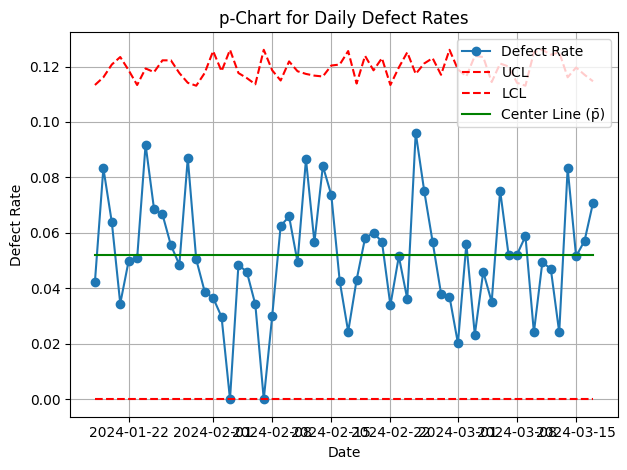

In [ ]:
plt.plot(df['Day'], df['Defect_Rate'], marker='o', label='Defect Rate')
plt.plot(df['Day'], df['UCL'], linestyle='--', color='red', label='UCL')
plt.plot(df['Day'], df['LCL'], linestyle='--', color='red', label='LCL')
plt.plot(df['Day'], df['p_bar'], linestyle='-', color='green', label='Center Line (p̄)')
plt.title('p-Chart for Daily Defect Rates')
plt.xlabel('Date')
plt.ylabel('Defect Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Test if last day's defect rate is significantly higher than average
last = df.iloc[-1]
count = last['Defects']
nobs = last['Sample_Size']

stat, pval = proportions_ztest(count, nobs, value=p_bar, alternative='larger')

print(f"Z-stat: {stat:.2f}, p-value: {pval:.4f}")
if pval < 0.05:
    print("Statistically significant increase in defects!")
else:
    print("No significant shift detected.")


Z-stat: 0.78, p-value: 0.2181
No significant shift detected.


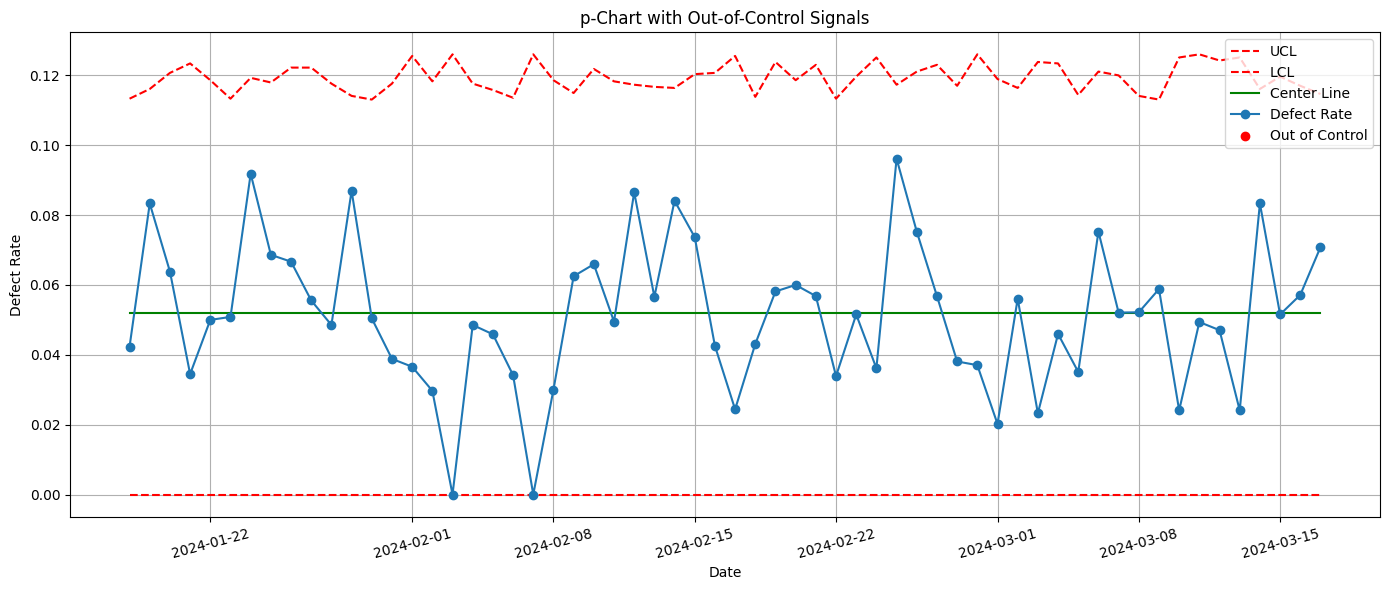

In [ ]:
plt.figure(figsize=(14, 6))

# Plot control limits and center line
plt.plot(df['Day'], df['UCL'], linestyle='--', color='red', label='UCL')
plt.plot(df['Day'], df['LCL'], linestyle='--', color='red', label='LCL')
plt.plot(df['Day'], df['p_bar'], linestyle='-', color='green', label='Center Line')

# Plot defect rate
plt.plot(df['Day'], df['Defect_Rate'], marker='o', label='Defect Rate')

# Highlight out-of-control points
out = df[(df['Defect_Rate'] > df['UCL']) | (df['Defect_Rate'] < df['LCL'])]
plt.scatter(out['Day'], out['Defect_Rate'], color='red', label='Out of Control')

# Labels and layout
plt.title('p-Chart with Out-of-Control Signals')
plt.xlabel('Date')
plt.ylabel('Defect Rate')
plt.legend()
plt.grid(True)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


# process shift

A process shift is when a process starts performing differently than usual often worse and can lead to more defects or
off-target results.

In [ ]:
# Step 1: Estimate standard deviation (sigma) for each row
df['sigma'] = np.sqrt((df['p_bar'] * (1 - df['p_bar'])) / df['Sample_Size'])

# SPC Rules (comments):
# Rule 1: 1 point beyond 3 sigma (UCL/LCL) => Obvious out-of-control event
# Rule 2: 2 of 3 consecutive points beyond 2 sigma on the same side => Moderate shift or bias
# Rule 3: 8 consecutive points on same side of center line (p_bar) => Subtle drift or trend


In [ ]:
# Step 2: Compute 1-sigma and 2-sigma control limits
df['Upper_1sigma'] = df['p_bar'] + df['sigma']
df['Lower_1sigma'] = df['p_bar'] - df['sigma']
df['Upper_2sigma'] = df['p_bar'] + 2 * df['sigma']
df['Lower_2sigma'] = df['p_bar'] - 2 * df['sigma']

# Clip lower sigma limits at zero (no negative defect rate)
df['Lower_1sigma'] = df['Lower_1sigma'].clip(lower=0)
df['Lower_2sigma'] = df['Lower_2sigma'].clip(lower=0)

# Rule 2: Flag if 2 of 3 consecutive points are beyond 2 sigma on same side

rule2_flags = [False] * len(df)  # Initialize flags list

for i in range(2, len(df)):
    window = df.iloc[i-2:i+1]
    # Check points beyond upper 2-sigma limit
    above_upper = window['Defect_Rate'] > window['Upper_2sigma']
    # Check points below lower 2-sigma limit
    below_lower = window['Defect_Rate'] < window['Lower_2sigma']

    # Rule 2 triggered if 2 or more in window are above upper 2-sigma or below lower 2-sigma
    if above_upper.sum() >= 2 or below_lower.sum() >= 2:
        rule2_flags[i] = True

df['Rule2_Flag'] = rule2_flags

print(df['Rule2_Flag'].value_counts())


Rule2_Flag
False    60
Name: count, dtype: int64


In [ ]:
# RULE 3: 8 or more points in a row on same side of center line (p_bar)

# Create a boolean column: True if defect rate > p_bar, else False
df['Above_center'] = df['Defect_Rate'] > df['p_bar']

run_lengths = [1]  # Initialize run lengths list

for i in range(1, len(df)):
    if df.loc[i, 'Above_center'] == df.loc[i-1, 'Above_center']:
        run_lengths.append(run_lengths[-1] + 1)  # continue the run
    else:
        run_lengths.append(1)  # run resets

df['Run_Length'] = run_lengths

# Flag rows where run length >= 8 (Rule 3 violation)
df['Rule3_Flag'] = df['Run_Length'] >= 8

print(df[['Day', 'Defect_Rate', 'Run_Length', 'Rule3_Flag']].tail(10))


          Day  Defect_Rate  Run_Length  Rule3_Flag
50 2024-03-08     0.052174           3       False
51 2024-03-09     0.058824           4       False
52 2024-03-10     0.024096           1       False
53 2024-03-11     0.049383           2       False
54 2024-03-12     0.047059           3       False
55 2024-03-13     0.024096           4       False
56 2024-03-14     0.083333           1       False
57 2024-03-15     0.051546           1       False
58 2024-03-16     0.057143           1       False
59 2024-03-17     0.070796           2       False


In [ ]:
import numpy as np
import pandas as pd

# Assuming df already has columns: 'Day', 'Sample_Size', 'Defects'
df['Defect_Rate'] = df['Defects'] / df['Sample_Size']

# Overall defect rate (center line)
p_bar = df['Defects'].sum() / df['Sample_Size'].sum()
df['p_bar'] = p_bar

# Estimate standard deviation (sigma) for each row
df['sigma'] = np.sqrt((df['p_bar'] * (1 - df['p_bar'])) / df['Sample_Size'])

# Control limits
df['UCL'] = df['p_bar'] + 3 * df['sigma']
df['LCL'] = df['p_bar'] - 3 * df['sigma']
df['LCL'] = df['LCL'].clip(lower=0)  # no negative limits

df['Upper_1sigma'] = df['p_bar'] + df['sigma']
df['Lower_1sigma'] = df['p_bar'] - df['sigma']
df['Lower_1sigma'] = df['Lower_1sigma'].clip(lower=0)

df['Upper_2sigma'] = df['p_bar'] + 2 * df['sigma']
df['Lower_2sigma'] = df['p_bar'] - 2 * df['sigma']
df['Lower_2sigma'] = df['Lower_2sigma'].clip(lower=0)

# RULE 1: Point beyond 3 sigma control limits
df['Rule1_Flag'] = (df['Defect_Rate'] > df['UCL']) | (df['Defect_Rate'] < df['LCL'])

# RULE 2: 2 of 3 consecutive points beyond 2 sigma on the same side
rule2_flags = [False] * len(df)
for i in range(2, len(df)):
    window = df.iloc[i-2:i+1]
    above_upper = window['Defect_Rate'] > window['Upper_2sigma']
    below_lower = window['Defect_Rate'] < window['Lower_2sigma']
    if above_upper.sum() >= 2 or below_lower.sum() >= 2:
        rule2_flags[i] = True
df['Rule2_Flag'] = rule2_flags

# RULE 3: 8 or more consecutive points on same side of center line (p_bar)
df['Above_center'] = df['Defect_Rate'] > df['p_bar']
run_lengths = [1]
for i in range(1, len(df)):
    if df.loc[i, 'Above_center'] == df.loc[i-1, 'Above_center']:
        run_lengths.append(run_lengths[-1] + 1)
    else:
        run_lengths.append(1)
df['Run_Length'] = run_lengths
df['Rule3_Flag'] = df['Run_Length'] >= 8

# Combine all rule flags into one column indicating any violation
df['Any_Rule_Violation'] = df[['Rule1_Flag', 'Rule2_Flag', 'Rule3_Flag']].any(axis=1)

# View violations with relevant columns
violations = df[df['Any_Rule_Violation']][
    ['Day', 'Defect_Rate', 'Rule1_Flag', 'Rule2_Flag', 'Rule3_Flag']
]

print(violations)


          Day  Defect_Rate  Rule1_Flag  Rule2_Flag  Rule3_Flag
19 2024-02-06     0.034188       False       False        True
20 2024-02-07     0.000000       False       False        True
21 2024-02-08     0.030000       False       False        True


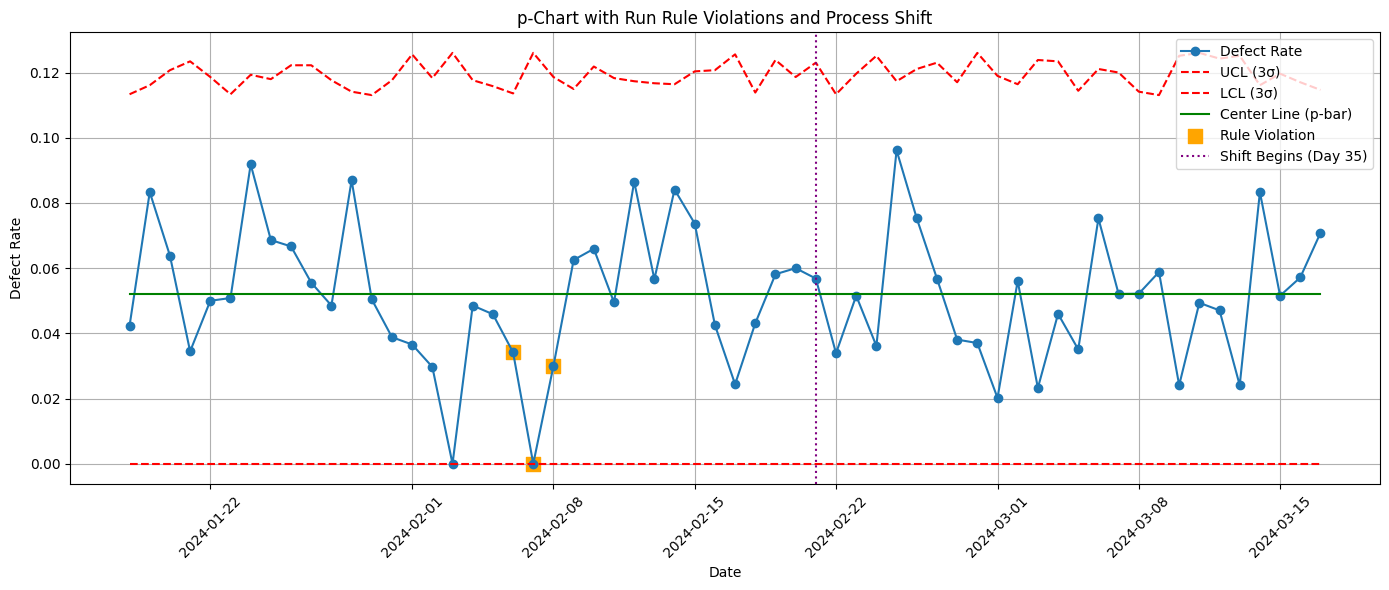

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

# Plot main defect rate line
plt.plot(df['Day'], df['Defect_Rate'], marker='o', label='Defect Rate')

# Plot control limits and center line
plt.plot(df['Day'], df['UCL'], linestyle='--', color='red', label='UCL (3σ)')
plt.plot(df['Day'], df['LCL'], linestyle='--', color='red', label='LCL (3σ)')
plt.plot(df['Day'], df['p_bar'], linestyle='-', color='green', label='Center Line (p-bar)')

# Highlight violations
plt.scatter(violations['Day'], violations['Defect_Rate'], color='orange', s=100, marker='s', label='Rule Violation')

# Add shift marker at day 35 (adjust index if needed)
plt.axvline(x=df.loc[34, 'Day'], color='purple', linestyle=':', label='Shift Begins (Day 35)')

# Final touches
plt.title('p-Chart with Run Rule Violations and Process Shift')
plt.xlabel('Date')
plt.ylabel('Defect Rate')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Define specification limits
LSL = 0.00
USL = 0.08

# Calculate process mean and standard deviation
mu = df['Defect_Rate'].mean()
sigma = df['Defect_Rate'].std()

# Process capability indices
cp = (USL - LSL) / (6 * sigma)
cpk = min((USL - mu) / (3 * sigma), (mu - LSL) / (3 * sigma))

# Print results
print(f"Cp = {cp:.2f}")
print(f"Cpk = {cpk:.2f}")


Cp = 0.64
Cpk = 0.46


In [ ]:
# Specification limits
LSL = 0.02
USL = 0.08

# Calculate process mean (p̄) and standard deviation (σ)
p_bar = df['Defect_Rate'].mean()
process_sigma = df['Defect_Rate'].std()

# Calculate Cp and Cpk
cp = (USL - LSL) / (6 * process_sigma)
cpk = min((USL - p_bar) / (3 * process_sigma), (p_bar - LSL) / (3 * process_sigma))

# Display results
print(f"Cp: {cp:.2f}, Cpk: {cpk:.2f}")


Cp: 0.48, Cpk: 0.46


In [ ]:
import numpy as np

# Bootstrapping: generate 10,000 sample means
boot_means = [np.mean(np.random.choice(df['Defect_Rate'], replace=True, size=len(df)))
              for _ in range(10000)]

# 95% Confidence Interval
ci_lower = np.percentile(boot_means, 2.5)
ci_upper = np.percentile(boot_means, 97.5)

print(f"Bootstrapped 95% CI for mean defect rate: ({ci_lower:.4f}, {ci_upper:.4f})")


Bootstrapped 95% CI for mean defect rate: (0.0459, 0.0564)


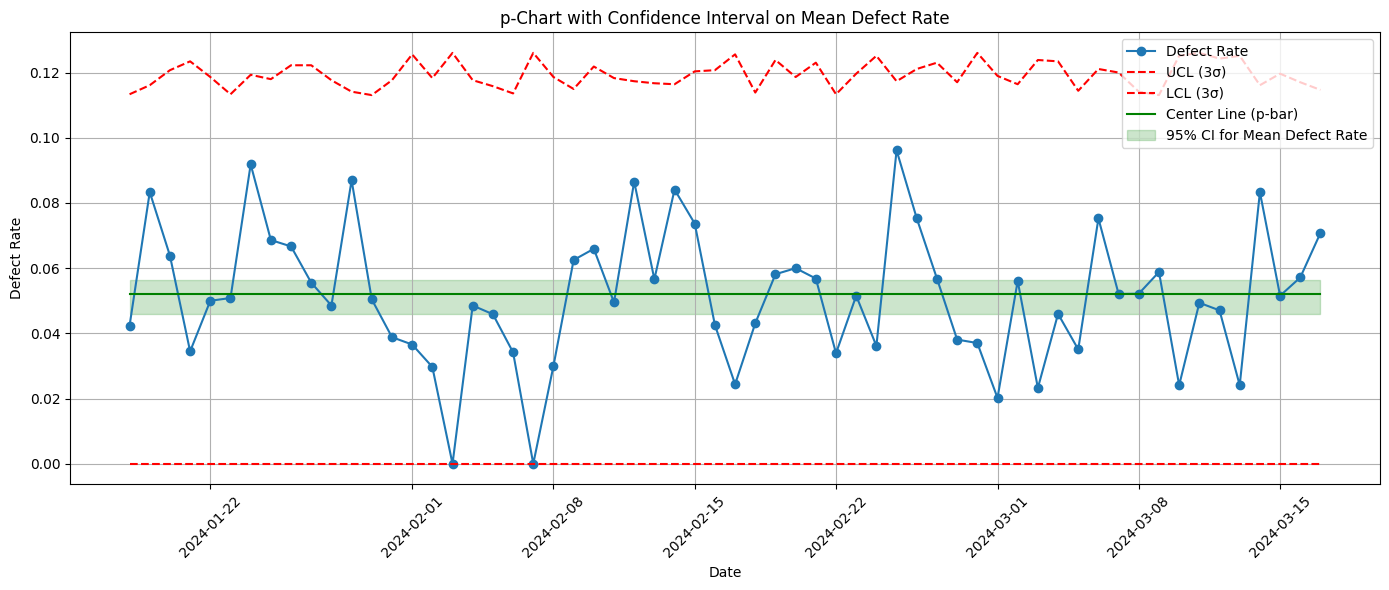

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Plot defect rate line
plt.plot(df['Day'], df['Defect_Rate'], marker='o', label='Defect Rate')

# Plot control limits and center line
plt.plot(df['Day'], df['UCL'], linestyle='--', color='red', label='UCL (3σ)')
plt.plot(df['Day'], df['LCL'], linestyle='--', color='red', label='LCL (3σ)')
plt.plot(df['Day'], df['p_bar'], linestyle='-', color='green', label='Center Line (p-bar)')

# Add confidence interval shading
plt.fill_between(df['Day'], ci_lower, ci_upper, color='green', alpha=0.2, label='95% CI for Mean Defect Rate')

# Final touches
plt.title('p-Chart with Confidence Interval on Mean Defect Rate')
plt.xlabel('Date')
plt.ylabel('Defect Rate')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


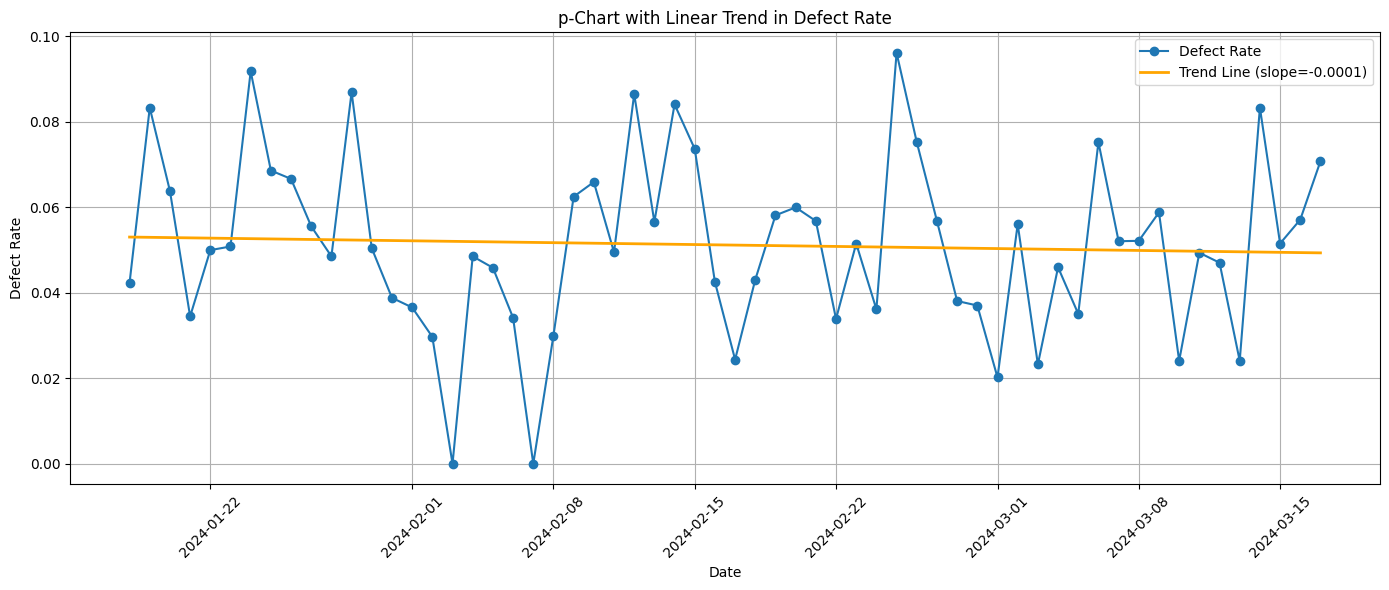

Regression slope: -0.0001
R-squared: 0.0028
P-value: 0.6882


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Create numeric x-axis (e.g., days as 1, 2, 3, ...)
df['Day_Num'] = range(1, len(df) + 1)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['Day_Num'], df['Defect_Rate'])

# Predicted trend line
df['Trend_Line'] = intercept + slope * df['Day_Num']

# Plot with trend
plt.figure(figsize=(14,6))
plt.plot(df['Day'], df['Defect_Rate'], marker='o', label='Defect Rate')
plt.plot(df['Day'], df['Trend_Line'], color='orange', linewidth=2, label=f'Trend Line (slope={slope:.4f})')
plt.title('p-Chart with Linear Trend in Defect Rate')
plt.xlabel('Date')
plt.ylabel('Defect Rate')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: print regression stats
print(f"Regression slope: {slope:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")


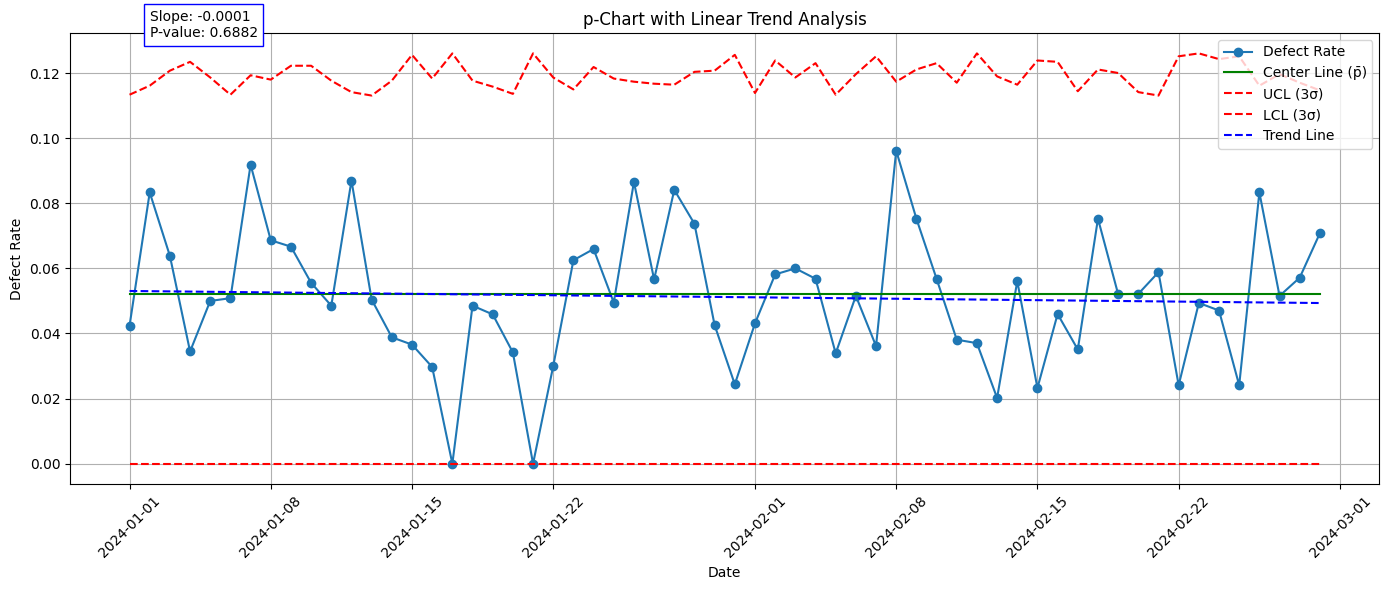

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# --- Simulate data (if not loaded already) ---
np.random.seed(42)
days = pd.date_range(start='2024-01-01', periods=60)
sample_size = np.random.randint(80, 120, size=60)
true_defect_rate = 0.05
defect_count = np.random.binomial(sample_size, true_defect_rate)
df = pd.DataFrame({
    'Day': days,
    'Sample_Size': sample_size,
    'Defects': defect_count
})
df['Defect_Rate'] = df['Defects'] / df['Sample_Size']

# --- Calculate p̄ and control limits ---
p_bar = df['Defects'].sum() / df['Sample_Size'].sum()
df['p_bar'] = p_bar
df['sigma'] = np.sqrt((p_bar * (1 - p_bar)) / df['Sample_Size'])
df['UCL'] = p_bar + 3 * df['sigma']
df['LCL'] = p_bar - 3 * df['sigma']
df['LCL'] = df['LCL'].clip(lower=0)  # Defect rate can't be negative

# --- Linear trend analysis ---
df['Day_Num'] = range(1, len(df) + 1)
slope, intercept, r_value, p_value, std_err = linregress(df['Day_Num'], df['Defect_Rate'])
df['Trend_Line'] = intercept + slope * df['Day_Num']

# --- Plot ---
plt.figure(figsize=(14, 6))
plt.plot(df['Day'], df['Defect_Rate'], marker='o', label='Defect Rate')
plt.plot(df['Day'], df['p_bar'], color='green', label='Center Line (p̄)')
plt.plot(df['Day'], df['UCL'], linestyle='--', color='red', label='UCL (3σ)')
plt.plot(df['Day'], df['LCL'], linestyle='--', color='red', label='LCL (3σ)')
plt.plot(df['Day'], df['Trend_Line'], linestyle='--', color='blue', label='Trend Line')

# --- Annotate slope & p-value ---
plt.text(df['Day'].iloc[1], max(df['UCL']) + 0.005,
         f"Slope: {slope:.4f}\nP-value: {p_value:.4f}",
         fontsize=10, bbox=dict(facecolor='white', edgecolor='blue'))

# --- Final touches ---
plt.title('p-Chart with Linear Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Defect Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
